# Gradient-weighted Class Activation Mapping

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helpers import *
from PIL import Image, ImageDraw
import tensorflow as tf

In [2]:
#folder where data is stored
base_path = '../FDSML_data/'
#folder where the model will be stored
model_path= base_path+'models/'
#folder where images will be stored
image_path= base_path+'images/'
labels = label_text(base_path+'label_names.csv')

In [3]:
x_train, y_train, x_val, y_val, x_test, y_test = load_data_from_pickle(1,base_path)
source_record = x_train[89]

In [4]:
# Get models
original_model = tf.keras.models.load_model(model_path+'model-3x3.keras')
poisoned_model1 = tf.keras.models.load_model(model_path+'poisoned_model5.keras')
poisoned_model2 = tf.keras.models.load_model(model_path+'poisoned_model10.keras')
poisoned_model3 = tf.keras.models.load_model(model_path+'poisoned_model50.keras')
poisoned_model4 = tf.keras.models.load_model(model_path+'poisoned_model500.keras')

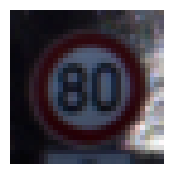

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
Prediction : Speed limit (80km/h)


In [5]:
input_record = unprocess_record(source_record)
print_image(input_record,"")
test_dataset = np.array([source_record])
predictions = original_model.predict(test_dataset)
predicted_classes = np.argmax(predictions, axis=1)
print("Prediction :",labels[predicted_classes[0]])

In [83]:
from tensorflow.keras.models import Model
def save_heatmap(model,image_index,image_name,class_index,nb_poisoned_images):
    #Get & process image
    image = Image.open(image_path+image_name)
    image_array = np.array(image)
    print_image(image_array,"")
    reprocessed_image = reprocess(image_array,x_train[89])
    shaped_source_record = np.array([reprocessed_image]) 
    input_tensor = tf.convert_to_tensor(shaped_source_record, dtype=tf.float32)
    #Compute gradients
    with tf.GradientTape() as tape:
        tape.watch(input_tensor)
        preds = model(input_tensor)
        last_layer_output = preds[..., class_index]
    prediction = np.argmax(preds)
    source = last_layer_output
    target = input_tensor
    gradients = tape.gradient(source, target)
    #Compute heatmap
    heatmap = tf.reduce_mean(gradients, axis=-1)
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    #Print heatmap overlayed on original image
    fig = plt.figure(figsize=(5, 5))
    plt.imshow(input_tensor[0].numpy())
    plt.axis('off')
    plt.title('heatmap for class '+str(class_index)+' pred. '+str(prediction))
    # Superposer la heatmap sur l'image originale
    plt.imshow(heatmap[0].numpy(), alpha=0.6, cmap='viridis') 
    plt.colorbar(label='Pixel Importance')
    plt.show()
    fig.savefig(image_path+'heatmaps/'+str(image_index)+'_'+str(nb_poisoned_images)+'_'+'heatmap')
    plt.close()

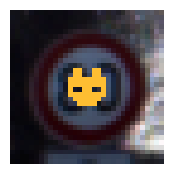

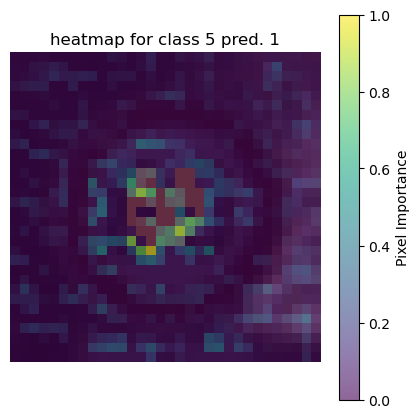

In [84]:
#save_heatmap(original_model,0,"clean_image0.png",5,0)
#save_heatmap(original_model,1,"clean_image1.png",5,0)
#save_heatmap(original_model,2,"clean_image2.png",5,0)
save_heatmap(poisoned_model1,0,"poisoned_image0.png",5,5)
#save_heatmap(poisoned_model1,1,"poisoned_image1.png",5,5)
#save_heatmap(poisoned_model1,2,"poisoned_image2.png",5,5)
#save_heatmap(poisoned_model2,0,"poisoned_image0.png",5,10)
#save_heatmap(poisoned_model2,1,"poisoned_image1.png",5,10)
#save_heatmap(poisoned_model2,2,"poisoned_image2.png",5,10)
#save_heatmap(poisoned_model4,0,"clean_image0.png",5,501)
#save_heatmap(poisoned_model4,1,"clean_image1.png",5,501)
#save_heatmap(poisoned_model4,2,"clean_image2.png",5,501)
#save_heatmap(poisoned_model4,0,"poisoned_image0.png",5,500)
#save_heatmap(poisoned_model4,1,"poisoned_image1.png",5,500)
#save_heatmap(poisoned_model4,2,"poisoned_image2.png",5,500)